<a href="https://colab.research.google.com/github/lucasdonizete/MetodosNumericos/blob/master/Trabalho2_Classification_DOGS_Image_Processing_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import cv2
import random
import zipfile 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization


In [2]:
#!gdown --id 1CoPQHEJx2P-p2RqjyEwTRDp2vMQUeAOw #comando que baixa do google drive
#!gdown --id 1VDDiCAgg-mMZAzufgw2l8vDgPEVHgmdN
!gdown --id 1Yw7ljjITBARPIBMgHeWh8LQx8Gl6jtwm

Downloading...
From: https://drive.google.com/uc?id=1Yw7ljjITBARPIBMgHeWh8LQx8Gl6jtwm
To: /content/ANN_dogs.zip
8.58MB [00:00, 27.3MB/s]


In [3]:
import zipfile
file_name = zipfile.ZipFile('ANN_dogs.zip', 'r')
file_name.extractall()

In [4]:
# all images are load in variable x...
FILE='ANN_dogs.zip'
Img_Size = 160
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x_gray.append(cv2.imread(name, 0))
        x_gray.append(cv2.resize(cv2.imread(name, 3),(Img_Size,Img_Size)))

In [5]:
y_names = [] # colocou as tres primeiras letras e colocou na lista de todas as imagens
for yy in img_name:
  name = yy[9]+yy[10]+yy[11]
  y_names.append(name)

In [6]:
unique_list = []    
for yy in y_names: #criacao das listas da ann
  if yy not in unique_list:
    unique_list.append(yy)
unique_list #criou as categorias dos cachorros

['BAS', 'BUL', 'LAB', 'POO']

In [7]:
n = len(unique_list)
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

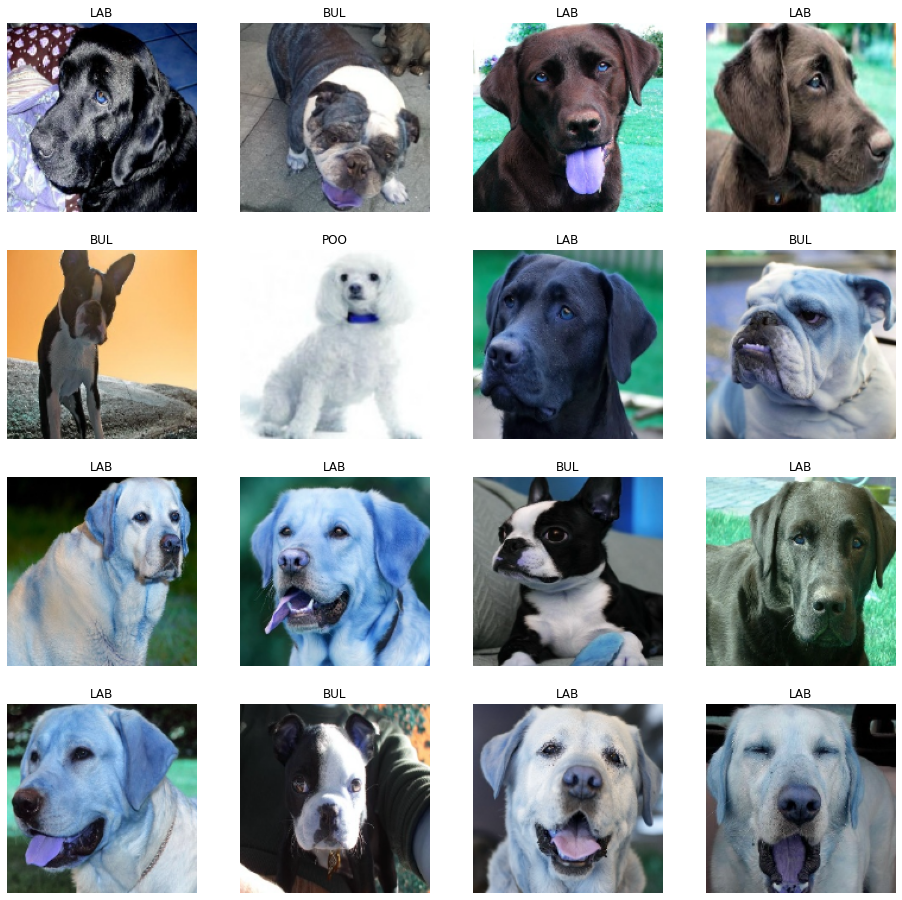

In [8]:
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(16): #mostra fotos aleatorias da biblioteca
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [9]:
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel()) #transforma as fotos/matrizes em linhas (Esse eh um comando que demora um pouco para ser executado)

X = pd.DataFrame(x_data)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) #separando os dataset em test e train

In [11]:
# helper
def ynindicator(y):
  N = len(y)
  K = len(set(y))
  I = np.zeros((N, K))
  I[np.arange(N), y] = 1
  return I

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)



# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=120))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [12]:
print(Y_train.shape)
print(X_train.shape)

(305, 4)
(305, 160, 160, 3)


In [13]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, epochs=60, batch_size=32)
print("Returned:", r)


Epoch 1/60
10/10 [==============================] - 18s 76ms/step - loss: 21.5609 - accuracy: 0.2567
Epoch 2/60
10/10 [==============================] - 0s 41ms/step - loss: 4.7456 - accuracy: 0.4236
Epoch 3/60
10/10 [==============================] - 0s 41ms/step - loss: 1.3996 - accuracy: 0.4988
Epoch 4/60
10/10 [==============================] - 0s 40ms/step - loss: 1.1723 - accuracy: 0.4828
Epoch 5/60
10/10 [==============================] - 0s 41ms/step - loss: 0.9280 - accuracy: 0.6039
Epoch 6/60
10/10 [==============================] - 0s 41ms/step - loss: 0.9913 - accuracy: 0.6078
Epoch 7/60
10/10 [==============================] - 0s 41ms/step - loss: 0.7681 - accuracy: 0.6797
Epoch 8/60
10/10 [==============================] - 0s 40ms/step - loss: 0.7507 - accuracy: 0.6872
Epoch 9/60
10/10 [==============================] - 0s 41ms/step - loss: 0.7214 - accuracy: 0.6966
Epoch 10/60
10/10 [==============================] - 0s 40ms/step - loss: 0.5930 - accuracy: 0.7807
Epoch 1

In [14]:

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['loss', 'accuracy'])


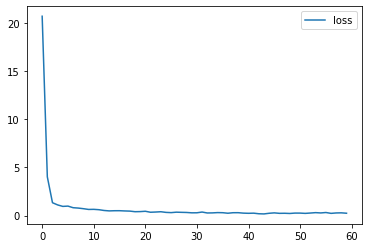

In [15]:

# plot some data
plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


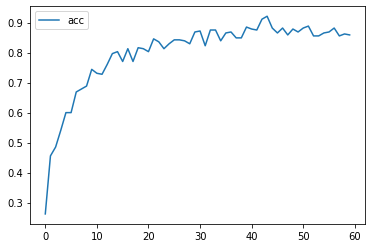

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
#plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [17]:
ynew = model.predict_classes(X_test)
print(ynew)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 0 2 2 1 2 1 3 2 2 2 3 2 2 3 1 0 3 0 0 0 0 0 0 0 1 2 1 2 3 0 0 3 3 1 2 1
 2 0 2 0 0 1 2 2 1 2 2 3 0 1 1 2 3 2 0 3 1 2 1 0 1 1 1 2 2 2 1 0 3 0 3 2 0
 1 0 2]


In [18]:
N_test = len(ynew)

In [19]:
y_resp = (model.predict(X_test) > 0.5).astype("int32")
#print(y_resp)

In [20]:
# model.predict(X_test)

In [21]:
# (model.predict(X_test)[0] > 0.5).astype("int32")

In [22]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(Y_test[k,kk] == 1):
      y_class[k] = kk
print(y_class)
y_true = y_class.copy()

[3 0 2 2 1 3 2 3 2 2 2 3 2 2 2 1 0 3 3 0 0 0 0 0 2 1 3 1 2 0 1 0 3 3 1 3 1
 3 2 2 0 0 1 3 2 2 0 1 3 0 1 3 0 3 1 3 3 2 2 3 0 1 1 1 2 2 2 1 3 0 0 3 2 0
 1 0 2]


In [23]:
#Y_test[-2,:]

In [24]:
y_class = np.zeros(N_test,dtype=int)
for k in range(N_test):
  for kk in range(K):
    if(y_resp[k,kk] == 1):
      y_class[k] = kk
y_pred = y_class.copy()

In [25]:
target_names = ['Basset', 'Bulldog', 'Labrador', 'Poodle']
print(classification_report(y_true, y_pred, target_names=target_names))
#print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      Basset       0.57      0.84      0.68        19
     Bulldog       0.80      0.75      0.77        16
    Labrador       0.64      0.73      0.68        22
      Poodle       0.89      0.40      0.55        20

    accuracy                           0.68        77
   macro avg       0.73      0.68      0.67        77
weighted avg       0.72      0.68      0.67        77

